In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
# import CSV

df = pd.read_csv("avatar.csv", sep = ",", encoding='latin')

In [3]:
# What columns do we have?

df.columns

Index(['Unnamed: 0', 'id', 'book', 'book_num', 'chapter', 'chapter_num',
       'character', 'full_text', 'character_words', 'writer', 'director',
       'imdb_rating'],
      dtype='object')

In [4]:
# Let's take a look at the first 10 rows

df.head()

,Unnamed: 0,id,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
0,1,1,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
1,2,2,Water,1,The Boy in the Iceberg,1,Scene Description,"As the title card fades, the scene opens onto ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
2,3,3,Water,1,The Boy in the Iceberg,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
3,4,4,Water,1,The Boy in the Iceberg,1,Scene Description,"The shot pans quickly from the boy to Katara, ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
4,5,5,Water,1,The Boy in the Iceberg,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1


In [5]:
# We only need some of the columns

avatar_df = df[['book','character','character_words']]
avatar_df = avatar_df.dropna()

In [6]:
avatar_df

,book,character,character_words
0,Water,Katara,Water. Earth. Fire. Air. My grandmother used t...
2,Water,Sokka,It's not getting away from me this time. Watc...
4,Water,Katara,"Sokka, look!"
5,Water,Sokka,"Sshh! Katara, you're going to scare it away. ..."
7,Water,Katara,"But, Sokka! I caught one!"
...,...,...,...
13379,Fire,Mai,I look like a man.
13380,Fire,Suki,And why did you paint me firebending?
13381,Fire,Sokka,I thought it looked more exciting that way. O...
13382,Fire,Iroh,"Hey, my belly's not that big anymore. I've rea..."


In [7]:
grouped = avatar_df.groupby(['book','character'])
result = grouped['character_words'].apply(lambda x: " ".join(x).lower())
result = result.reset_index()
result

,book,character,character_words
0,Earth,Aang,"nah, just a nightmare. i was in the avatar sta..."
1,Earth,Adult guest,fluffykins? what are you doing down there?
2,Earth,Agent,dinner. the council of five and the military ...
3,Earth,Audience,oooh.
4,Earth,Azula,my brother and my uncle have disgraced the fir...
...,...,...,...
449,Water,Yue,"thank you, father. may the great ocean and moo..."
450,Water,Yugoda,are you here for the healing lesson? welcome ....
451,Water,Zhang leader,where are the rest of the gan jin? still tidyi...
452,Water,Zhao,"getting in the way of what, prince zuko? it's..."


In [8]:
def clean_text(text):
    text=text.lower()
    text=re.sub('\\d|\\W+|_',' ',text)
    text=re.sub('[^a-zA-Z]'," ", text)
    
    return text

def tokenize(text):
    ADDITIONAL_STOPWORDS = []
    stop_words = stopwords.words('english') + ADDITIONAL_STOPWORDS
    txt_token= word_tokenize(text)
    txt_no_stopwords = [word for word in txt_token if word not in stop_words]
    
    return txt_no_stopwords

def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

def stem_text(word_list):
    porter = PorterStemmer()
    
    return [porter.stem(word) for word in word_list]

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review) # calculating the polarity scores for each doc in the corpus
    return vs['compound'] # returning the compound score
    
    
def vader_analysis(compound): # setting thresholds for what compound scores are considered positive, negative, or neutral
    if compound >=0.2:
        return 'Positive'
    elif compound <-0.2:
        return 'Negative'
    else:
        return 'Neutral'

In [9]:
result['txt_clean'] = result['character_words'].apply(clean_text)
result['txt_tokenized'] = result['txt_clean'].apply(tokenize)
result['txt_stemmed'] = result['txt_tokenized'].apply(stem_text)
result['text_final'] = result['txt_stemmed'].apply(lambda text: ' '.join(text))
result['Number of Words'] = result['text_final'].apply(lambda x: len(x.split()))

In [10]:
result

,book,character,character_words,txt_clean,txt_tokenized,txt_stemmed,text_final,Number of Words
0,Earth,Aang,"nah, just a nightmare. i was in the avatar sta...",nah just a nightmare i was in the avatar state...,"[nah, nightmare, avatar, state, outside, body,...","[nah, nightmar, avatar, state, outsid, bodi, w...",nah nightmar avatar state outsid bodi watch sc...,2183
1,Earth,Adult guest,fluffykins? what are you doing down there?,fluffykins what are you doing down there,[fluffykins],[fluffykin],fluffykin,1
2,Earth,Agent,dinner. the council of five and the military ...,dinner the council of five and the military ar...,"[dinner, council, five, military, loyal, earth...","[dinner, council, five, militari, loyal, earth...",dinner council five militari loyal earth king ...,14
3,Earth,Audience,oooh.,oooh,[oooh],[oooh],oooh,1
4,Earth,Azula,my brother and my uncle have disgraced the fir...,my brother and my uncle have disgraced the fir...,"[brother, uncle, disgraced, fire, lord, brough...","[brother, uncl, disgrac, fire, lord, brought, ...",brother uncl disgrac fire lord brought shame u...,692
...,...,...,...,...,...,...,...,...
449,Water,Yue,"thank you, father. may the great ocean and moo...",thank you father may the great ocean and moon ...,"[thank, father, may, great, ocean, moon, spiri...","[thank, father, may, great, ocean, moon, spiri...",thank father may great ocean moon spirit watch...,208
450,Water,Yugoda,are you here for the healing lesson? welcome ....,are you here for the healing lesson welcome we...,"[healing, lesson, welcome, welcome, lucky, boy...","[heal, lesson, welcom, welcom, lucki, boy, bet...",heal lesson welcom welcom lucki boy betroth ne...,39
451,Water,Zhang leader,where are the rest of the gan jin? still tidyi...,where are the rest of the gan jin still tidyin...,"[rest, gan, jin, still, tidying, camp, site, k...","[rest, gan, jin, still, tidi, camp, site, know...",rest gan jin still tidi camp site know canyon ...,247
452,Water,Zhao,"getting in the way of what, prince zuko? it's...",getting in the way of what prince zuko it s co...,"[getting, way, prince, zuko, commander, genera...","[get, way, princ, zuko, command, gener, iroh, ...",get way princ zuko command gener iroh great he...,754


In [11]:
# # Save to excel so I don't have to do all this cleaning again

# result.to_excel('Post_clean_ATLA.xlsx',index=False)

In [12]:
overall_linecounts = avatar_df['character'].value_counts()

In [13]:
water = avatar_df.loc[avatar_df['book'] == "Water"]
earth = avatar_df.loc[avatar_df['book'] == "Earth"]
fire = avatar_df.loc[avatar_df['book'] == "Fire"]

In [14]:
water['txt_clean'] = water['character_words'].apply(clean_text)
water['txt_tokenized'] = water['txt_clean'].apply(tokenize)
water['txt_stemmed'] = water['txt_tokenized'].apply(stem_text)
water['text_final'] = water['txt_stemmed'].apply(lambda text: ' '.join(text))
water['Number of Words'] = water['text_final'].apply(lambda x: len(x.split()))
earth['txt_clean'] = earth['character_words'].apply(clean_text)
earth['txt_tokenized'] = earth['txt_clean'].apply(tokenize)
earth['txt_stemmed'] = earth['txt_tokenized'].apply(stem_text)
earth['text_final'] = earth['txt_stemmed'].apply(lambda text: ' '.join(text))
earth['Number of Words'] = earth['text_final'].apply(lambda x: len(x.split()))
fire['txt_clean'] = fire['character_words'].apply(clean_text)
fire['txt_tokenized'] = fire['txt_clean'].apply(tokenize)
fire['txt_stemmed'] = fire['txt_tokenized'].apply(stem_text)
fire['text_final'] = fire['txt_stemmed'].apply(lambda text: ' '.join(text))
fire['Number of Words'] = fire['text_final'].apply(lambda x: len(x.split()))

<ipython-input-14-18ec6607add5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water['txt_clean'] = water['character_words'].apply(clean_text)
<ipython-input-14-18ec6607add5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water['txt_tokenized'] = water['txt_clean'].apply(tokenize)
<ipython-input-14-18ec6607add5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [15]:
# Applying Vader Analysis to the text_final to get a feel for the "tone" of the data

# initializing the analyzer from Vader

analyzer = SentimentIntensityAnalyzer()

# creating 2 new columns in the dataframe applying the two functions defined above

water['Vader Sentiment'] = water['text_final'].apply(vadersentimentanalysis)
water['Vader Analysis'] = water['Vader Sentiment'].apply(vader_analysis)
earth['Vader Sentiment'] = earth['text_final'].apply(vadersentimentanalysis)
earth['Vader Analysis'] = earth['Vader Sentiment'].apply(vader_analysis)
fire['Vader Sentiment'] = fire['text_final'].apply(vadersentimentanalysis)
fire['Vader Analysis'] = fire['Vader Sentiment'].apply(vader_analysis)

<ipython-input-15-c22bfb55a7c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water['Vader Sentiment'] = water['text_final'].apply(vadersentimentanalysis)
<ipython-input-15-c22bfb55a7c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water['Vader Analysis'] = water['Vader Sentiment'].apply(vader_analysis)
<ipython-input-15-c22bfb55a7c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [16]:
water_counts = water.groupby(['character','Vader Analysis']).size().reset_index(name='Count')
pivoted_counts = water_counts.pivot(index='character', columns='Vader Analysis', values='Count').reset_index()
pivoted_counts.fillna(0, inplace=True)
pivoted_counts['Total'] = pivoted_counts['Negative'] + pivoted_counts['Neutral'] + pivoted_counts['Positive']
# pivoted_counts = pivoted_counts.loc[pivoted_counts['Total'] >= 10.00]
pivoted_counts['Water % Positive'] = pivoted_counts['Positive'] / pivoted_counts['Total']
# pivoted_counts.style.format({'% Positive': "{:.2%}"})
sorted_water = pivoted_counts.sort_values(by='Water % Positive', ascending=False)
# sorted_counts.to_excel('Water_sorted.xlsx',index=False)

In [17]:
earth_counts = earth.groupby(['character','Vader Analysis']).size().reset_index(name='Count')
pivoted_counts = earth_counts.pivot(index='character', columns='Vader Analysis', values='Count').reset_index()
pivoted_counts.fillna(0, inplace=True)
pivoted_counts['Total'] = pivoted_counts['Negative'] + pivoted_counts['Neutral'] + pivoted_counts['Positive']
# pivoted_counts = pivoted_counts.loc[pivoted_counts['Total'] >= 10.00]
pivoted_counts['Earth % Positive'] = pivoted_counts['Positive'] / pivoted_counts['Total']
# pivoted_counts.style.format({'% Positive': "{:.2%}"})
sorted_earth = pivoted_counts.sort_values(by='Earth % Positive', ascending=False)
# sorted_counts.to_excel('Earth_sorted.xlsx',index=False)

In [18]:
fire_counts = fire.groupby(['character','Vader Analysis']).size().reset_index(name='Count')
pivoted_counts = fire_counts.pivot(index='character', columns='Vader Analysis', values='Count').reset_index()
pivoted_counts.fillna(0, inplace=True)
pivoted_counts['Total'] = pivoted_counts['Negative'] + pivoted_counts['Neutral'] + pivoted_counts['Positive']
# pivoted_counts = pivoted_counts.loc[pivoted_counts['Total'] >= 10.00]
pivoted_counts['Fire % Positive'] = pivoted_counts['Positive'] / pivoted_counts['Total']
# pivoted_counts.style.format({'% Positive': "{:.2%}"})
sorted_fire = pivoted_counts.sort_values(by='Fire % Positive', ascending=False)
# sorted_counts.to_excel('Fire_sorted.xlsx',index=False)

In [19]:
merged_counts = pd.merge(pd.merge(sorted_water, sorted_earth,on='character'), sorted_fire, on="character")
merged_counts = merged_counts.sort_values(by='character')
merged_counts['Book 1: Water Positivity'] = merged_counts['Water % Positive'] * 100
merged_counts['Book 2: Earth Positivity'] = merged_counts['Earth % Positive'] * 100
merged_counts['Book 3: Fire Positivity'] = merged_counts['Fire % Positive'] * 100

In [20]:
merged_counts

Vader Analysis,character,Negative_x,Neutral_x,Positive_x,Total_x,Water % Positive,Negative_y,Neutral_y,Positive_y,Total_y,Earth % Positive,Negative,Neutral,Positive,Total,Fire % Positive,Book 1: Water Positivity,Book 2: Earth Positivity,Book 3: Fire Positivity
4,Aang,91.0,471.0,257.0,819.0,0.313797,52.0,298.0,142.0,492.0,0.288618,82.0,255.0,149.0,486.0,0.306584,31.379731,28.861789,30.658436
1,Bato,2.0,15.0,11.0,28.0,0.392857,0.0,2.0,0.0,2.0,0.000000,2.0,5.0,1.0,8.0,0.125000,39.285714,0.000000,12.500000
13,Engineer,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.0,0.000000,0.0,3.0,0.0,3.0,0.000000,0.000000,0.000000,0.000000
16,Fire Sage,1.0,0.0,0.0,1.0,0.000000,1.0,1.0,1.0,3.0,0.333333,2.0,0.0,1.0,3.0,0.333333,0.000000,33.333333,33.333333
9,Guard,1.0,10.0,3.0,14.0,0.214286,3.0,9.0,1.0,13.0,0.076923,2.0,2.0,0.0,4.0,0.000000,21.428571,7.692308,0.000000
8,Hakoda,1.0,2.0,1.0,4.0,0.250000,3.0,3.0,2.0,8.0,0.250000,10.0,31.0,24.0,65.0,0.369231,25.000000,25.000000,36.923077
3,Iroh,23.0,61.0,45.0,129.0,0.348837,20.0,87.0,74.0,181.0,0.408840,4.0,11.0,12.0,27.0,0.444444,34.883721,40.883978,44.444444
5,Katara,89.0,374.0,173.0,636.0,0.272013,52.0,250.0,111.0,413.0,0.268765,56.0,211.0,121.0,388.0,0.311856,27.201258,26.876513,31.185567
15,Li,0.0,1.0,0.0,1.0,0.000000,0.0,2.0,0.0,2.0,0.000000,4.0,5.0,4.0,13.0,0.307692,0.000000,0.000000,30.769231
14,Ozai,1.0,3.0,0.0,4.0,0.000000,1.0,1.0,3.0,5.0,0.600000,15.0,28.0,7.0,50.0,0.140000,0.000000,60.000000,14.000000


In [21]:
avatar_df['txt_clean'] = avatar_df['character_words'].apply(clean_text)
avatar_df['txt_tokenized'] = avatar_df['txt_clean'].apply(tokenize)
avatar_df['txt_stemmed'] = avatar_df['txt_tokenized'].apply(stem_text)
avatar_df['text_final'] = avatar_df['txt_stemmed'].apply(lambda text: ' '.join(text))
avatar_df['Number of Words'] = avatar_df['text_final'].apply(lambda x: len(x.split()))
avatar_df['Vader Sentiment'] = avatar_df['text_final'].apply(vadersentimentanalysis)
avatar_df['Vader Analysis'] = avatar_df['Vader Sentiment'].apply(vader_analysis)

In [22]:
avatar_counts = avatar_df.groupby(['character','Vader Analysis']).size().reset_index(name='Count')
pivoted_counts = avatar_counts.pivot(index='character', columns='Vader Analysis', values='Count').reset_index()
pivoted_counts.fillna(0, inplace=True)
pivoted_counts['Total'] = pivoted_counts['Negative'] + pivoted_counts['Neutral'] + pivoted_counts['Positive']
pivoted_counts = pivoted_counts.loc[pivoted_counts['Total'] >= 25.00]
pivoted_counts['Overall % Positive'] = pivoted_counts['Positive'] / pivoted_counts['Total']
# pivoted_counts.style.format({'% Positive': "{:.2%}"})
sorted_avatar = pivoted_counts.sort_values(by='Overall % Positive', ascending=False)
sorted_avatar.to_excel('ATLA Vader Sorted.xlsx',index=False)

In [23]:
sorted_avatar.style.format({'Overall % Positive': "{:.2%}"})

Vader Analysis,character,Negative,Neutral,Positive,Total,Overall % Positive
323,Ty Lee,4.000000,25.000000,35.000000,64.000000,54.69%
50,Chong,2.000000,13.000000,18.000000,33.000000,54.55%
288,Sozin,3.000000,9.000000,14.000000,26.000000,53.85%
40,Bumi,3.000000,28.000000,24.000000,55.000000,43.64%
140,Iroh,47.000000,159.000000,131.000000,337.000000,38.87%
145,Joo Dee,4.000000,14.000000,11.000000,29.000000,37.93%
228,Pakku,7.000000,16.000000,14.000000,37.000000,37.84%
157,Kuei,6.000000,19.000000,15.000000,40.000000,37.50%
368,Zei,2.000000,15.000000,10.000000,27.000000,37.04%
148,June,1.000000,17.000000,10.000000,28.000000,35.71%


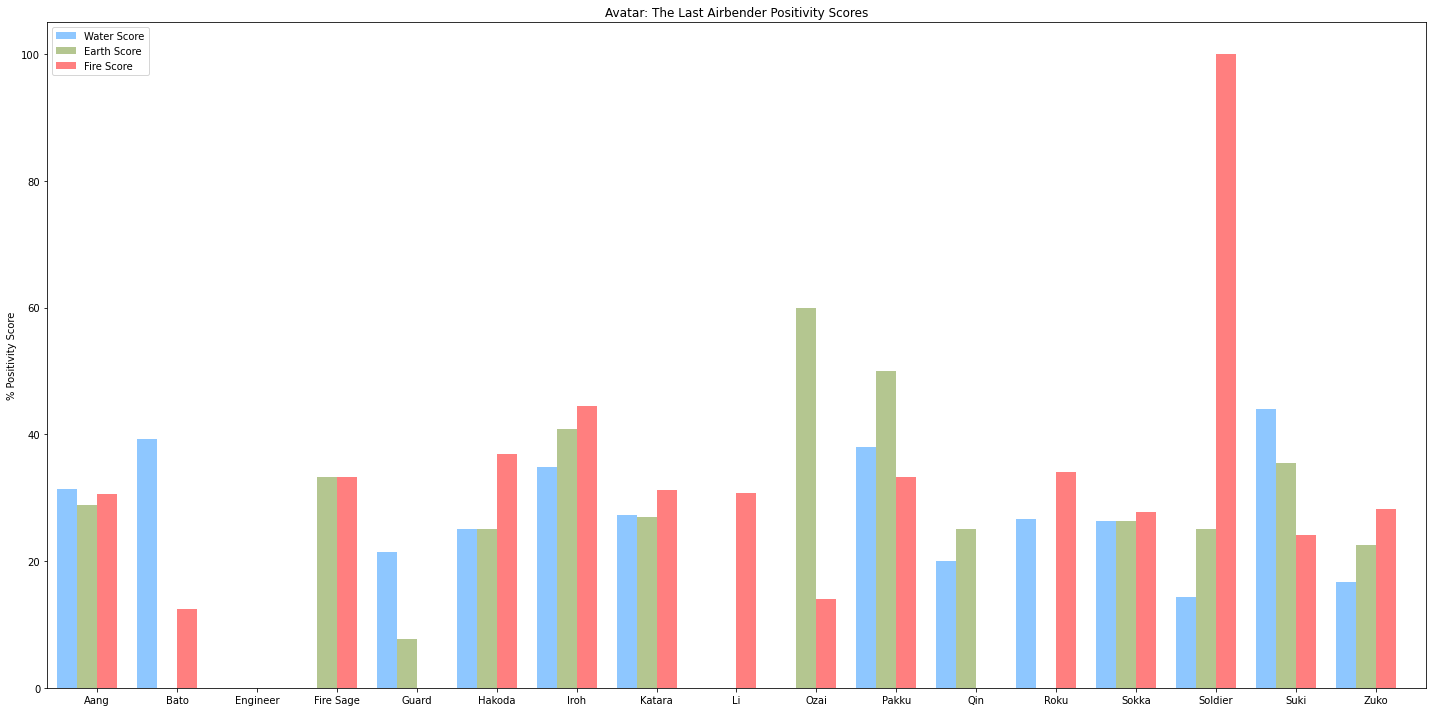

In [46]:
pos = list(range(len(merged_counts['character'])))
width = 0.25
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(pos, merged_counts['Book 1: Water Positivity'], width, alpha=0.5, color='#1E90FF')
plt.bar([p + width for p in pos], merged_counts['Book 2: Earth Positivity'], width, alpha=.5, color='#6B8E23')
plt.bar([p + width*2 for p in pos], merged_counts['Book 3: Fire Positivity'], width, alpha=.5, color='#FF0000')
ax.set_ylabel('% Positivity Score')
ax.set_title('Avatar: The Last Airbender Positivity Scores')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(merged_counts['character'])
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(merged_counts['Water % Positive'] + merged_counts['Earth % Positive'] + merged_counts['Fire % Positive'])] )
plt.legend(['Water Score', 'Earth Score', 'Fire Score'], loc='upper left')
plt.tight_layout()
# plt.show()
# plt.savefig('ATLA Positivity')